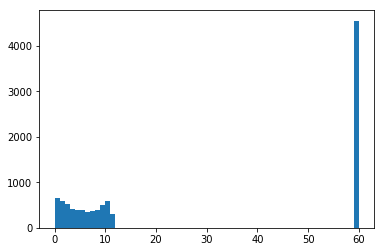

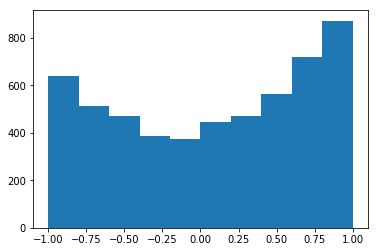

number of photoelectric events 4551
number of compton events 5449
number of total events is 10000


In [48]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

E = [1.8389, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0, 400.0, 500.0, 600.0, 800.0, 1000.01]
mua = [3192, 2777, 978.4, 452.9, 245.0, 147.0, 64.68, 33.6, 9.97, 4.19, 1.31, .635, .396, .292, .207, .173, .140, .125, .107, .0954, .0870, .0805, .0706, .0635]
#length = len(E)
#frac is compton fraction
frac = [0.000, 0.000, 0.000, 0.000, 0.000, 0.001, 0.002, 0.006, 0.019, 0.044, 0.137, 0.274, 0.426, 0.560, 0.750, 0.853, 0.950, 0.977, 0.992, 0.996, 0.998, 0.999, 0.999, 0.999]
#frac_len = len(frac)

def InterpolateE(E_input):    #gives mass attenuation
    #mua_new =0
    for i in range(len(E)):
        #print(i, E[i])
        if((E_input <= E[i])): 
            mua_new = (((E_input-E[i-1])/(E[i]-E[i-1]))*(mua[i]-mua[i-1])) + mua[i-1]
            return mua_new
    return 3

def InterpolateFrac(E_input): #gives compton fraction
    frac_new = 0
    for i in range(len(frac)):
        if((E_input <= E[i])):
            frac_new = ((E_input-E[i-1])/(E[i]-E[i-1]))*(frac[i]-frac[i-1]) + frac[i-1]
            return frac_new
def FindMu(E_input):   #gives linear attenuation
    mu = InterpolateE(E_input)*2.33 
    return mu
#example of 6.0 KeV

#DETERMINE IF IT INTERACTS
Ein = 60.0   #input energy
mu1 = FindMu(Ein)

listE = []
listk = []
c_pe = 0  #counts the number of photoelctric events
c_comp = 0#counts the number of compton events
c = 0  #counts the number of interactions
while c < 10000:
    x = random.random()
    f = -(1/mu1)*math.log(1.0-x)
    if f > 0.01:  #no interaction
        c =c
        continue 
    else: #interaction, f < 0.01
        c = c+1
        cf = InterpolateFrac(Ein) #IF IT INTERACTS, INTERPOLATE COMPTON FRAC AND DECIDE TYPE OF INTEREACTION
        r1 = random.random()
        if r1 > cf: #PE event
            c_pe = c_pe +1
            listE.append(Ein) #IF PE EVENT, APPEND INCIDENT ENERGY IN HISTOGRAM
        else: #COMPTON EVENT, USE ACCEPTANCE/REJECTION
            test = -999
            while test < 0:
                k = random.uniform(-1,1)
                ang_rad = math.acos(k) #scattering angle
                P = 1/(1 + (Ein/511)*(1-k))
                kn = (1/2)*(P**2)*(P + (1/P) - np.sin(ang_rad)**2)  #Klein-Nishina
                r2 = random.uniform(0,1)
                if r2 < kn: #accept this klein-nishina value and calculate deposited energy
                    Ef = Ein/(1 + (Ein/511)*(1-k))
                    Edep = Ein- Ef #deposited energy
                    c_comp = c_comp + 1
                    listE.append(Edep)
                    listk.append(k)
                    test = 999
                else:
                #c=c
                    continue #needs to take me back to else statement
                
            
            

plt.hist(listE, bins = 60)
plt.show()


plt.hist(listk)
plt.show()

print("number of photoelectric events", c_pe)
print("number of compton events", c_comp)
print("number of total events is", c)